# Multi plot Recovery from inactivation

## For Manuscript main article purpose only

In [20]:
%clear
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import odeint
from scipy.optimize import curve_fit

%matplotlib inline



mpl.rcParams['figure.dpi']=310
mpl.rcParams['figure.titlesize']=20
mpl.rcParams['axes.facecolor']='white'        
mpl.rcParams['lines.linewidth']=2.0
mpl.rcParams['axes.linewidth']=2.0
mpl.rcParams["font.family"] = "serif"
mpl.rcParams['xtick.major.size']=4.0
mpl.rcParams['xtick.minor.size']=3.0
mpl.rcParams['xtick.major.width']=3.2
mpl.rcParams['xtick.minor.width']=2.4
mpl.rcParams['ytick.major.size']=4.0
#mpl.rcParams['ytick.minor.size']=2
mpl.rcParams['ytick.major.width']=3.2
#mpl.rcParams['ytick.minor.width ']=0.6
mpl.rcParams['xtick.major.pad']=6
mpl.rcParams['ytick.major.pad']=6
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['axes.titlesize']=18
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['axes.grid']='False'
mpl.rcParams['axes.axisbelow']='line' 
mpl.rcParams["axes.labelweight"] = "normal" #"bold"
mpl.rcParams['legend.fontsize']=12

In [2]:
import pandas as pd

folder="/home/urekmazino/PHD/NOTEBOOK/Data_exp_Kv/"

# Recovery dataset

dataset_rec = pd.read_csv(folder+"Rec_datasets.csv", skiprows=1)

rec_data = dataset_rec.to_numpy()

rec_data_WT = rec_data[:,1]

rec_data_S390N = rec_data[:,3]

rec_data_M373I = rec_data[:,5]

dataset_rec2 = pd.read_csv(folder+"S390N_rec_bis_dataset.csv", skiprows=1)

rec2_data = dataset_rec2.to_numpy()

rec_data_S390New = rec2_data[:,1]

dataset_errWT = np.genfromtxt(folder+"error_WT.txt",delimiter=" ")

err_data_WT = dataset_errWT[:,1]

dataset_errM = np.genfromtxt(folder+"error_M373I.txt",delimiter=" ")

err_data_M373I = dataset_errM[:,1]

dataset_errS = np.genfromtxt(folder+"error_S390N.txt",delimiter=" ")

err_data_S390N = dataset_errS[:,1]

## Recovery WT

In [3]:
def ode_rec_WT (C, t, p):
    
    C0=C[0]
    C1=C[1]
    C2=C[2]
    C3=C[3]
    C4=C[4]
    I0=C[5]
    I1=C[6]
    I2=C[7]
    I3=C[8]
    I4=C[9]
    O=C[10]

    
    #constants
    
    T = 291.0 #K or 18 degree celsius
    e =  1.602176634 * (10**-19.0) # C
    K_B = 1.380649 * (10**-23.0) # J*K^-1
    
    exp_factor = (e/(K_B * T)) * (10**-3) 

    #Voltage sequences
    
    V = 0.0 #mV 

    if p[5] <= t < p[6]:
        V=p[0]
        
    if p[6] <= t < p[7]:
        V=p[1]
        
    if p[7] <= t <= p[8]:
        V=p[2]
        
    if p[8] < t <= p[9]:
        V=p[3]
 
    if t > p[9]:
        V=p[4]

    alpha_0 = 3.35079341e+03 #s^-1
    alpha_1 = 3.28685357e-01   #s^-1
    
    beta_0 = 1.05273741e+02 #s^-1
    beta_1 = 2.33456113e+00  #s^-1
    
    k_CO_0 = 6.76097035e+02 #s^-1
    k_CO_1 = 2.32986592e-01  #s^-1
    
    k_OC_0 = 8.55022238e+01 #s^-1
    k_OC_1 = 1.18068777e-03   #s^-1
    
    k_CI = 1.30092357e+02 #s^-1
    k_IC = 3.89986657e-01   #s^-1 0.20
    
    f = 4.31533471e-01 # 0.31
     
    #voltage dependent rate constants
    
    alpha = alpha_0 * np.exp(alpha_1 * (V * exp_factor))
    beta = beta_0 * np.exp(-1.0 * beta_1 * (V * exp_factor))
    k_CO = k_CO_0 * np.exp(k_CO_1 * (V * exp_factor))
    k_OC = k_OC_0 * np.exp(-1.0 * k_OC_1 * (V * exp_factor))
    
    
    # ODEs
    
    dC0dt = beta * C1 + (k_IC/(f**4.0)) * I0 - (k_CI*(f**4.0) + 4.0 * alpha) * C0
    dC1dt = 4.0 * alpha * C0 + 2.0 * beta * C2 + (k_IC/(f**3.0)) * I1 - (k_CI*(f**3.0) + beta + 3.0 * alpha) * C1 
    dC2dt = 3.0 * alpha * C1 + 3.0 * beta * C3 + (k_IC/(f**2.0)) * I2 - (k_CI*(f**2.0) + 2.0 * beta + 2.0 * alpha) * C2 
    dC3dt = 2.0 * alpha * C2 + 4.0 * beta * C4 + (k_IC/f) * I3 - (k_CI*f + 3.0 * beta + 1.0 * alpha) * C3 
    dC4dt = 1.0 * alpha * C3 + k_OC * O + k_IC * I4 - (k_CI + k_CO + 4.0 * beta) * C4 
    
    dI0dt = beta * f * I1 + (k_CI*(f**4.0)) * C0 - (k_IC/(f**4.0) + 4.0 * (alpha/f)) * I0
    dI1dt = 4.0 * (alpha/f) * I0 + 2.0 * beta * f * I2 + (k_CI*(f**3.0)) * C1 - (k_IC/(f**3.0) + beta * f + 3.0 * (alpha/f)) * I1 
    dI2dt = 3.0 * (alpha/f) * I1 + 3.0 * beta * f * I3 + (k_CI*(f**2.0)) * C2 - (k_IC/(f**2.0) + 2.0 * beta * f + 2.0 * (alpha/f)) * I2 
    dI3dt = 2.0 * (alpha/f) * I2 + 4.0 * beta * f * I4 + (k_CI*f) * C3 - (k_IC/f + 3.0 * beta * f + 1.0 * (alpha/f)) * I3 
    dI4dt = 1.0 * (alpha/f) * I3 + k_CI * C4 - (k_IC + 4.0 * beta * f) * I4     
    
    dOdt = k_CO * C4 - k_OC * O
    
    return (dC0dt, dC1dt, dC2dt, dC3dt, dC4dt, dI0dt, dI1dt, dI2dt, dI3dt, dI4dt, dOdt)

## Recovery M373I

In [4]:
def ode_rec_M373I (C, t, p):
    
    C0=C[0]
    C1=C[1]
    C2=C[2]
    C3=C[3]
    C4=C[4]
    I0=C[5]
    I1=C[6]
    I2=C[7]
    I3=C[8]
    I4=C[9]
    O=C[10]

    
    #constants
    
    T = 291.0 #K or 18 degree celsius
    e =  1.602176634 * (10**-19.0) # C
    K_B = 1.380649 * (10**-23.0) # J*K^-1
    
    exp_factor = (e/(K_B * T)) * (10**-3) 

    #Voltage sequences
    
    V = 0.0 #mV 

    if p[5] <= t < p[6]:
        V=p[0]
        
    if p[6] <= t < p[7]:
        V=p[1]
        
    if p[7] <= t <= p[8]:
        V=p[2]
        
    if p[8] < t <= p[9]:
        V=p[3]
 
    if t > p[9]:
        V=p[4]

    alpha_0 = 3.35079341e+03 #s^-1
    alpha_1 = 3.28685357e-01   #s^-1
    
    beta_0 = 1.05273741e+02 #s^-1
    beta_1 = 1.88456113e+00 #s^-1
    
    k_CO_0 = 2.76097035e+01 #s^-1
    k_CO_1 = 1.12986592e-01  #s^-1
    
    k_OC_0 = 1.55022238e+01 #s^-1
    k_OC_1 = 1.18068777e-03   #s^-1 -03
    
    k_CI = 4.94092357e+01 #s^-1
    k_IC = 1.09986657e-01 #s^-1 0.20
    
    f = 3.31533471e-01 # 0.31   

    
    #voltage dependent rate constants
    
    alpha = alpha_0 * np.exp(alpha_1 * (V * exp_factor))
    beta = beta_0 * np.exp(-1.0 * beta_1 * (V * exp_factor))
    k_CO = k_CO_0 * np.exp(k_CO_1 * (V * exp_factor))
    k_OC = k_OC_0 * np.exp(-1.0 * k_OC_1 * (V * exp_factor))
        
    # ODEs
    
    dC0dt = beta * C1 + (k_IC/(f**4.0)) * I0 - (k_CI*(f**4.0) + 4.0 * alpha) * C0
    dC1dt = 4.0 * alpha * C0 + 2.0 * beta * C2 + (k_IC/(f**3.0)) * I1 - (k_CI*(f**3.0) + beta + 3.0 * alpha) * C1 
    dC2dt = 3.0 * alpha * C1 + 3.0 * beta * C3 + (k_IC/(f**2.0)) * I2 - (k_CI*(f**2.0) + 2.0 * beta + 2.0 * alpha) * C2 
    dC3dt = 2.0 * alpha * C2 + 4.0 * beta * C4 + (k_IC/f) * I3 - (k_CI*f + 3.0 * beta + 1.0 * alpha) * C3 
    dC4dt = 1.0 * alpha * C3 + k_OC * O + k_IC * I4 - (k_CI + k_CO + 4.0 * beta) * C4 
    
    dI0dt = beta * f * I1 + (k_CI*(f**4.0)) * C0 - (k_IC/(f**4.0) + 4.0 * (alpha/f)) * I0
    dI1dt = 4.0 * (alpha/f) * I0 + 2.0 * beta * f * I2 + (k_CI*(f**3.0)) * C1 - (k_IC/(f**3.0) + beta * f + 3.0 * (alpha/f)) * I1 
    dI2dt = 3.0 * (alpha/f) * I1 + 3.0 * beta * f * I3 + (k_CI*(f**2.0)) * C2 - (k_IC/(f**2.0) + 2.0 * beta * f + 2.0 * (alpha/f)) * I2 
    dI3dt = 2.0 * (alpha/f) * I2 + 4.0 * beta * f * I4 + (k_CI*f) * C3 - (k_IC/f + 3.0 * beta * f + 1.0 * (alpha/f)) * I3 
    dI4dt = 1.0 * (alpha/f) * I3 + k_CI * C4 - (k_IC + 4.0 * beta * f) * I4     
    
    dOdt = k_CO * C4 - k_OC * O
    
    return (dC0dt, dC1dt, dC2dt, dC3dt, dC4dt, dI0dt, dI1dt, dI2dt, dI3dt, dI4dt, dOdt)

## Recovery S390N

In [5]:
def ode_rec_S390N (C, t, p):
    
    C0=C[0]
    C1=C[1]
    C2=C[2]
    C3=C[3]
    C4=C[4]
    I0=C[5]
    I1=C[6]
    I2=C[7]
    I3=C[8]
    I4=C[9]
    O=C[10]

    
    #constants
    
    T = 291.0 #K or 18 degree celsius
    e =  1.602176634 * (10**-19.0) # C
    K_B = 1.380649 * (10**-23.0) # J*K^-1
    
    exp_factor = (e/(K_B * T)) * (10**-3) 

    #Voltage sequences
    
    V = 0.0 #mV 

    if p[5] <= t < p[6]:
        V=p[0]
        
    if p[6] <= t < p[7]:
        V=p[1]
        
    if p[7] <= t <= p[8]:
        V=p[2]
        
    if p[8] <= t <= p[9]:
        V=p[3]
 
    if t >= p[9]:
        V=p[4]
    
    alpha_0 = 3.35079341e+03 #s^-1
    alpha_1 = 3.28685357e-01   #s^-1
    
    beta_0 = 1.05273741e+02 #s^-1
    beta_1 = 1.73456113e+00  #s^-1
    
    k_CO_0 = 6.76097035e+02 #s^-1
    k_CO_1 = 1.02986592e-01  #s^-1
    
    k_OC_0 = 8.55022238e+01 #s^-1
    k_OC_1 = 1.18068777e-03   #s^-1
    
    k_CI = 1.24092357e+02 #s^-1
    k_IC = 3.89986657e-03 #s^-1 0.20
    
    f = 4.61533471e-01 # 0.31 
    
    #voltage dependent rate constants
    
    alpha = alpha_0 * np.exp(alpha_1 * (V * exp_factor))
    beta = beta_0 * np.exp(-1.0 * beta_1 * (V * exp_factor))
    k_CO = k_CO_0 * np.exp(k_CO_1 * (V * exp_factor))
    k_OC = k_OC_0 * np.exp(-1.0 * k_OC_1 * (V * exp_factor))
    
    
    # ODEs
    
    dC0dt = beta * C1 + (k_IC/(f**4.0)) * I0 - (k_CI*(f**4.0) + 4.0 * alpha) * C0
    dC1dt = 4.0 * alpha * C0 + 2.0 * beta * C2 + (k_IC/(f**3.0)) * I1 - (k_CI*(f**3.0) + beta + 3.0 * alpha) * C1 
    dC2dt = 3.0 * alpha * C1 + 3.0 * beta * C3 + (k_IC/(f**2.0)) * I2 - (k_CI*(f**2.0) + 2.0 * beta + 2.0 * alpha) * C2 
    dC3dt = 2.0 * alpha * C2 + 4.0 * beta * C4 + (k_IC/f) * I3 - (k_CI*f + 3.0 * beta + 1.0 * alpha) * C3 
    dC4dt = 1.0 * alpha * C3 + k_OC * O + k_IC * I4 - (k_CI + k_CO + 4.0 * beta) * C4 
    
    dI0dt = beta * f * I1 + (k_CI*(f**4.0)) * C0 - (k_IC/(f**4.0) + 4.0 * (alpha/f)) * I0
    dI1dt = 4.0 * (alpha/f) * I0 + 2.0 * beta * f * I2 + (k_CI*(f**3.0)) * C1 - (k_IC/(f**3.0) + beta * f + 3.0 * (alpha/f)) * I1 
    dI2dt = 3.0 * (alpha/f) * I1 + 3.0 * beta * f * I3 + (k_CI*(f**2.0)) * C2 - (k_IC/(f**2.0) + 2.0 * beta * f + 2.0 * (alpha/f)) * I2 
    dI3dt = 2.0 * (alpha/f) * I2 + 4.0 * beta * f * I4 + (k_CI*f) * C3 - (k_IC/f + 3.0 * beta * f + 1.0 * (alpha/f)) * I3 
    dI4dt = 1.0 * (alpha/f) * I3 + k_CI * C4 - (k_IC + 4.0 * beta * f) * I4     
    
    dOdt = k_CO * C4 - k_OC * O
    
    return (dC0dt, dC1dt, dC2dt, dC3dt, dC4dt, dI0dt, dI1dt, dI2dt, dI3dt, dI4dt, dOdt)

In [6]:
Vhold   =  -90.0 # mV
Vpulse  =   60.0 # mV
Vinter  =  -90.0 # mV
Vrep    =   60.0 # mV
Vfin    =  -90.0 # mV

# conductance parameters

#EK      = 0.0    # mV
gK_max_WT     = 33.2
gK_max_M373I  = 28.9     # nS 
gK_max_S390N  = 15.9

# Assuming no leaking
#EL      = 0.0    # mV
#gL_max  = 0.0    # mS 

# Membrane capacitance
Cm      = 1.0    # microF cm^-2

# Time of experiments
tini_eq   = 0    # s
tini_prep = 1.00 # s
tini_pulse = 2.00 # s
tini_repo = 3.00 # s
tend = 4.00 # s

pulse_interval = 0.015 # s
max_pulse_interval = 0.300 # s
min_pulse_interval = 0.015 # s

# Time discretiztion
Npoints = 100000
Points_per_sec = np.int(Npoints/tend) 


# time array
t = np.linspace(tini_eq,tend,Npoints)

# Guess of initial conditions for the states 

C0_0=0.4390
C1_0=0.2588
C2_0=0.0572
C3_0=0.0056
C4_0=0.0002
I0_0=0.0128
I1_0=0.0553
I2_0=0.0894
I3_0=0.0642
I4_0=0.0172
O_0=0.0001

# Pack up the parameters and initial conditions:

z0 = [C0_0, C1_0, C2_0, C3_0, C4_0, I0_0, I1_0, I2_0, I3_0, I4_0, O_0]

steps = np.abs(np.int((max_pulse_interval-min_pulse_interval)/pulse_interval)) + 1

Open_states = np.zeros((Npoints,steps))

max_conductance = np.zeros(steps) 

max_currents = np.zeros(steps)

max_conductance_prep = np.zeros(steps)

max_currents_prep = np.zeros(steps)

raw_current_WT=np.zeros(Npoints)

raw_current_M=np.zeros(Npoints)

raw_current_S=np.zeros(Npoints)

In [7]:
for i in range(0,steps):
    
    
    # Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
    
    time_pulse = tini_pulse + pulse_interval * (i + 1)
    time_end_pulse = time_pulse + 1.00
    
    K = [Vhold, Vpulse, Vinter, Vrep, Vfin, tini_eq, tini_prep, tini_pulse, time_pulse, time_end_pulse]


    # ODE solver parameters
    abserr = 1.0e-8
    relerr = 1.0e-6

    # Call for the ODE integrator with initial conditions z0 and parameter K
    C = odeint(ode_rec_WT, z0, t, args=(K,))

    Open_states[:,i] = C[:,10]
    
    if i==9:
        # just to plot
        raw_current_WT[:] = C[:,10]
    
    #max_conductance[i] = gK_max * np.amax(C[np.int(Points_per_sec*tini_test)+1:,10]-C[np.int(Points_per_sec*tini_test)-100,10])
    
    max_conductance[i] = gK_max_WT * np.amax(C[np.int(Points_per_sec*time_pulse):,10])
    
    max_conductance_prep[i] = gK_max_WT * np.amax(C[np.int(Points_per_sec*tini_prep):np.int(Points_per_sec*tini_pulse),10])
    
    # Compute the current proportional to the open channel conductance and potential applied
    
    max_currents[i] = max_conductance[i] * (Vpulse - Vhold) # nS * mV = pA
    
    max_currents_prep[i] = max_conductance_prep[i] * (Vpulse - Vhold) # nS * mV = pA

I_Imax_WT = np.true_divide(max_currents,max_currents_prep)

In [8]:
for i in range(0,steps):
    
    
    # Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
    
    time_pulse = tini_pulse + pulse_interval * (i + 1)
    time_end_pulse = time_pulse + 1.00
    
    K = [Vhold, Vpulse, Vinter, Vrep, Vfin, tini_eq, tini_prep, tini_pulse, time_pulse, time_end_pulse]


    # ODE solver parameters
    abserr = 1.0e-8
    relerr = 1.0e-6

    # Call for the ODE integrator with initial conditions z0 and parameter K
    C = odeint(ode_rec_M373I, z0, t, args=(K,))

    Open_states[:,i] = C[:,10]
          
    if i==9:
        # just to plot
        raw_current_M[:] = C[:,10]
        
    #max_conductance[i] = gK_max * np.amax(C[np.int(Points_per_sec*tini_test)+1:,10]-C[np.int(Points_per_sec*tini_test)-100,10])
    
    max_conductance[i] = gK_max_M373I * np.amax(C[np.int(Points_per_sec*time_pulse):,10])
    
    max_conductance_prep[i] = gK_max_M373I * np.amax(C[np.int(Points_per_sec*tini_prep):np.int(Points_per_sec*tini_pulse),10])
    
    # Compute the current proportional to the open channel conductance and potential applied
    
    max_currents[i] = max_conductance[i] * (Vpulse - Vhold) # nS * mV = pA
    
    max_currents_prep[i] = max_conductance_prep[i] * (Vpulse - Vhold) # nS * mV = pA

I_Imax_M373I = np.true_divide(max_currents,max_currents_prep)

In [9]:
for i in range(0,steps):
    
    
    # Define Potential function (To be improved if one wants to do IV, deactivation, inactivation or recovery)
    
    time_pulse = tini_pulse + pulse_interval * (i + 1)
    time_end_pulse = time_pulse + 1.00
    
    K = [Vhold, Vpulse, Vinter, Vrep, Vfin, tini_eq, tini_prep, tini_pulse, time_pulse, time_end_pulse]


    # ODE solver parameters
    abserr = 1.0e-8
    relerr = 1.0e-6

    # Call for the ODE integrator with initial conditions z0 and parameter K
    C = odeint(ode_rec_S390N, z0, t, args=(K,))

    Open_states[:,i] = C[:,10]
        
    if i==9:
        # just to plot
        raw_current_S[:] = C[:,10]
        
    #max_conductance[i] = gK_max * np.amax(C[np.int(Points_per_sec*tini_test)+1:,10]-C[np.int(Points_per_sec*tini_test)-100,10])
    
    max_conductance[i] = gK_max_S390N * np.amax(C[np.int(Points_per_sec*time_pulse):,10])
    
    max_conductance_prep[i] = gK_max_S390N * np.amax(C[np.int(Points_per_sec*tini_prep):np.int(Points_per_sec*tini_pulse),10])
    
    # Compute the current proportional to the open channel conductance and potential applied
    
    max_currents[i] = max_conductance[i] * (Vpulse - Vhold) # nS * mV = pA
    
    max_currents_prep[i] = max_conductance_prep[i] * (Vpulse - Vhold) # nS * mV = pA

I_Imax_S390N = np.true_divide(max_currents,max_currents_prep)

In [10]:
def Simple_exp_eq(x,tau):
    return 1.0 - np.exp(-(x - 15.0) / tau)

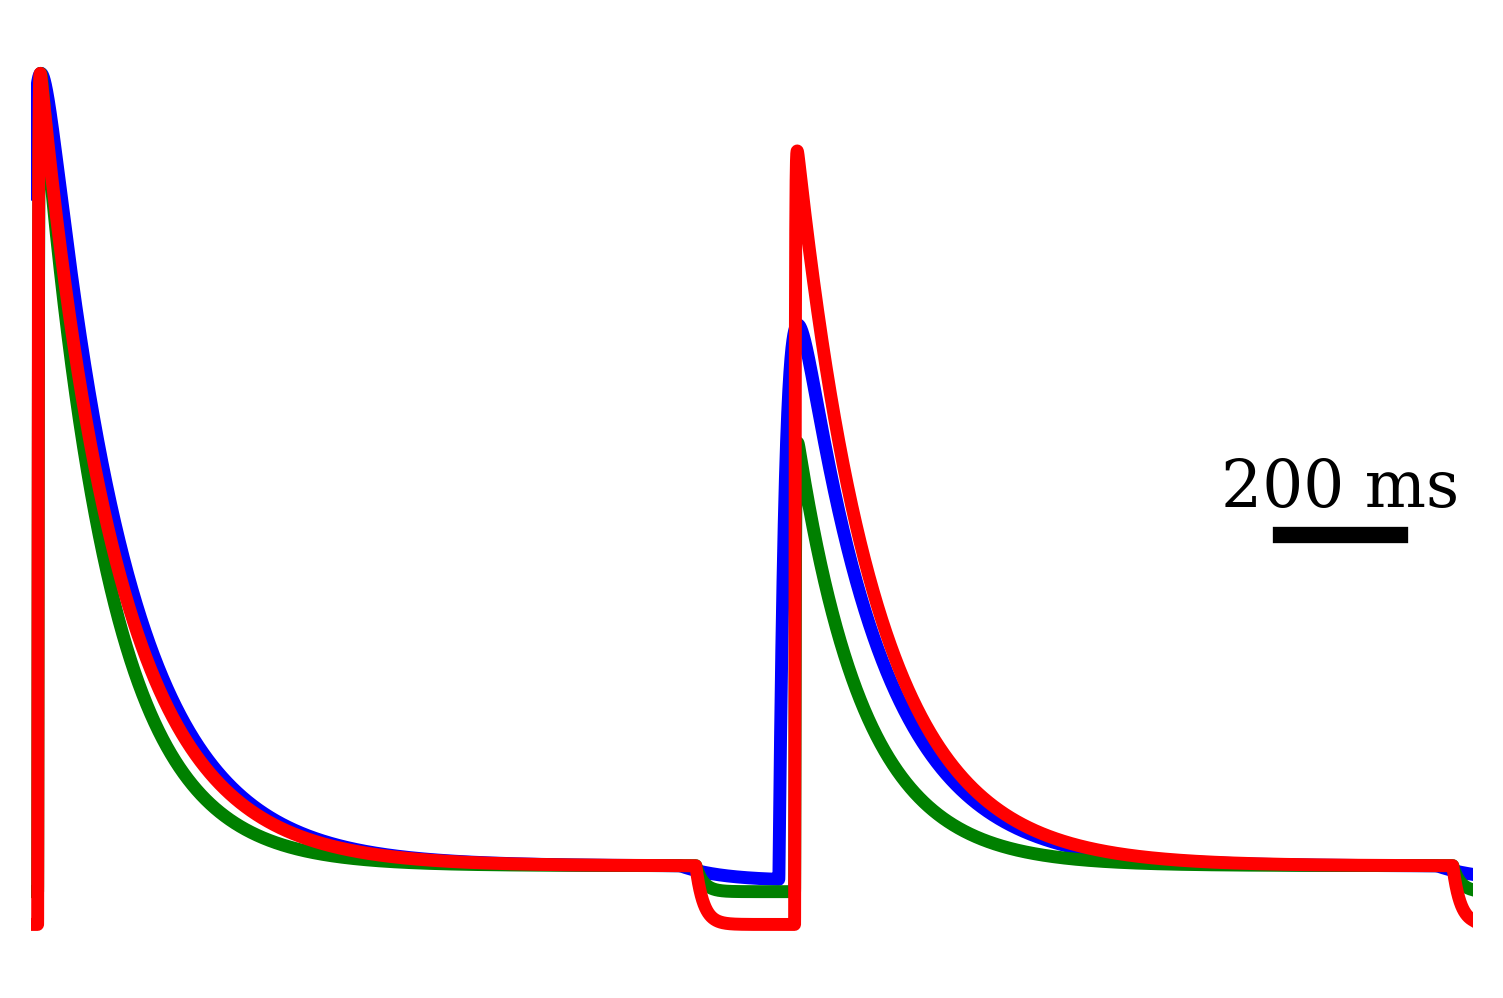

In [23]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

fontprops = fm.FontProperties(size=15)


fig = plt.figure()

axes = fig.add_subplot(111)

#vfont = {'fontname':'Arial'}

# first scale max-min with the tail and after the shift

norm_curr_WT = (raw_current_WT-np.amin(raw_current_WT[np.int(Points_per_sec*1.05):np.int(Points_per_sec*1.95)])) /(np.amax(raw_current_WT)-np.amin(raw_current_WT[np.int(Points_per_sec*1.05):np.int(Points_per_sec*1.95)])) #-np.amin(raw_current_WT)

norm_curr_M  = (raw_current_M-np.amin(raw_current_M[np.int(Points_per_sec*1.05):np.int(Points_per_sec*1.95)]))  /(np.amax(raw_current_M)-np.amin(raw_current_M[np.int(Points_per_sec*1.05):np.int(Points_per_sec*1.95)])) #-np.amin(raw_current_M)

norm_curr_S  = (raw_current_S-np.amin(raw_current_S[np.int(Points_per_sec*1.05):np.int(Points_per_sec*1.95)]))  /(np.amax(raw_current_S)-np.amin(raw_current_S[np.int(Points_per_sec*1.05):np.int(Points_per_sec*1.95)])) #-np.amin(raw_current_S)

t_M = np.linspace(-0.024,3.976,Npoints)

#plt.plot(t, norm_curr_WT , 'r-', linewidth=2.5, label="WT")
plt.plot(t_M, norm_curr_M , 'b-', linewidth=3.0, label="M373I")
plt.plot(t, norm_curr_S , 'g-',linewidth=3.0, label="S390N")
plt.plot(t, norm_curr_WT , 'r-', linewidth=3.0, label="WT")

axes.set_xlim([0.99,3.18])
plt.xlabel('Time (s)')
#plt.ylabel('$I_{memb}$ (pA)')

scalebar = AnchoredSizeBar(axes.transData,
                           0.2, '200 ms', 'center right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           label_top=True,
                           size_vertical=0.015,
                           fontproperties=fontprops)

axes.add_artist(scalebar)

plt.axis('off')
#plt.legend(loc='upper left')
plt.show()

In [14]:
print(np.amin(raw_current_M[np.int(Points_per_sec*1.05):np.int(Points_per_sec*1.95)]))
print(np.amin(raw_current_M[np.int(Points_per_sec*2.25):np.int(Points_per_sec*3.1)]))
print(np.amin(raw_current_WT))
ciao = np.where(raw_current_M == np.amax(raw_current_M))
ciao = np.where(norm_curr_M == np.amax(norm_curr_M))
ciao2 = np.where(norm_curr_S == np.amax(norm_curr_S))
print(ciao2)
600/25000

0.005317199514071451
0.005270594651889627
1.457340750491432e-11
(array([25119]),)


0.024

<Figure size 1860x1240 with 0 Axes>

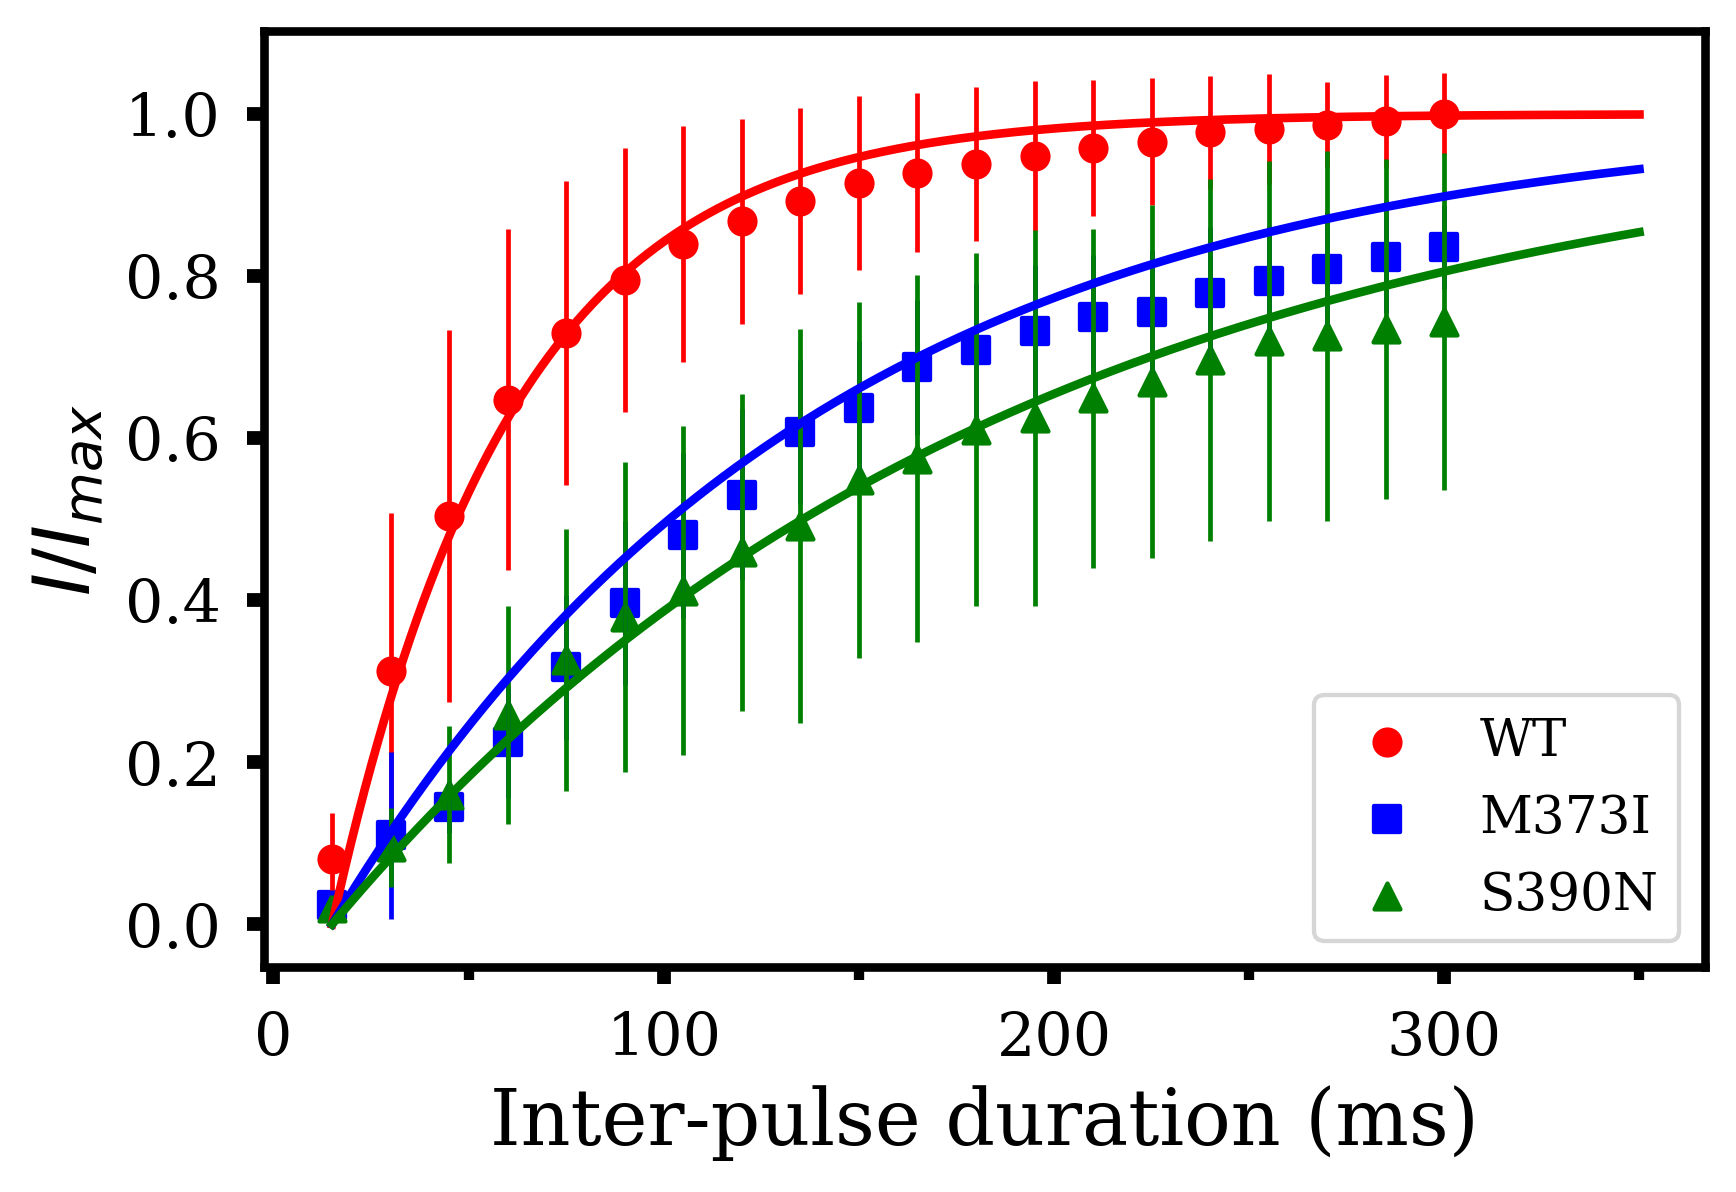

In [22]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

x0 = np.linspace(15,350,1000)
interpulses = np.linspace(15,300,20)

vfont = {'fontname':'TimesNewRoman'}


fig = plt.figure()
fig, ax = plt.subplots()

error_upWT = Simple_exp_eq(x0, 52.00)
error_dwWT = Simple_exp_eq(x0, 40.00)
error_WT = (error_upWT-error_dwWT)/2
#plt.scatter(interpulses,I_Imax_WT, label='sim points')
plt.scatter(interpulses,rec_data_WT, label='WT', color='r')
plt.errorbar(interpulses,rec_data_WT, yerr=err_data_WT,linestyle="None",elinewidth=1.1 ,color='r')
plt.plot(x0, Simple_exp_eq(x0, 46.00), color='r')
#plt.fill_between(x0, Simple_exp_eq(x0, 46.00)-error_WT, Simple_exp_eq(x0, 46.00)+error_WT)

error_upM373I = Simple_exp_eq(x0, 127.00)
error_dwM373I = Simple_exp_eq(x0, 109.00)
error_M373I = (error_upM373I-error_dwM373I)/2
#plt.scatter(interpulses,I_Imax_M373I, label='sim points')
plt.scatter(interpulses,rec_data_M373I, label='M373I', color='b', marker='s')
plt.errorbar(interpulses,rec_data_M373I, yerr=err_data_M373I,linestyle="None", elinewidth=1.1 ,color='b')
plt.plot(x0, Simple_exp_eq(x0, 124.70), color='b')
#plt.fill_between(x0, Simple_exp_eq(x0, 118.00)-error_M373I, Simple_exp_eq(x0, 118.00)+error_M373I)

error_upS390N = Simple_exp_eq(x0, 185.00)
error_dwS390N = Simple_exp_eq(x0, 163.00)
error_S390N = (error_upS390N-error_dwS390N)/2
#plt.scatter(interpulses,I_Imax_S390N, label='sim points')
plt.scatter(interpulses,rec_data_S390New, label='S390N', color='g', marker='^')
plt.errorbar(interpulses,rec_data_S390New, yerr=err_data_S390N,linestyle="None", elinewidth=1.1 ,color='g')
plt.plot(x0, Simple_exp_eq(x0, 174.00), color='g')
#plt.fill_between(x0, Simple_exp_eq(x0, 174.00)-error_S390N, Simple_exp_eq(x0, 174.00)+error_S390N, color='C3', alpha=0.2)


ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(50))

plt.legend(loc='best')
plt.xlabel('Inter-pulse duration (ms)')
plt.ylabel('$I/I_{max}$ ')
plt.show()